# Introduction

Merging multiple excel or csv file into one with the filename. Below example give a better explanation

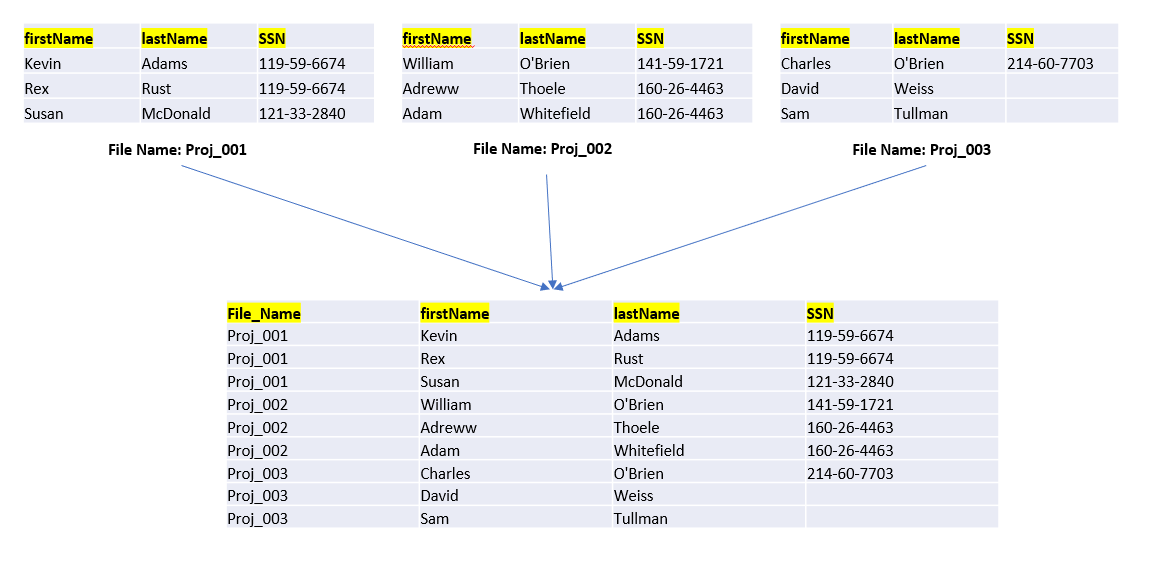

# Data

https://github.com/SuryaSD/Compiler/blob/main/Files.zip

# Problem Statement

#### 1. Merging specific files from a folder.
#### 2. Identify if any file is missing which has to be merged.
#### 3. Checking if all file contains same headers or not. If not then we need to identify those file names.
#### 4. Merge all the Excel / CSV files.
#### 5. Adding a column name called "File_Name" which contains the file name.

#### Problem Statement 1: How to merge specific files from a folder?

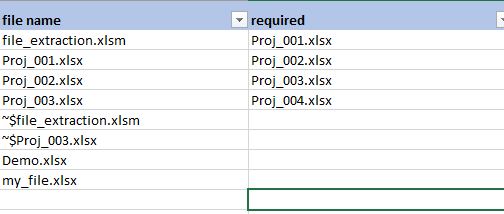

**"file name"** contains all the file names of a specific folder which you can get it by using the macro

https://github.com/SuryaSD/Compiler/blob/main/file_extraction.xlsm

**"required"** contains all the file names need to be merged

That is how you can merge specific files

#### Problem Statement 2: Identify if any file is missing which has to be merged.

we want to merge Proj_001,Proj_002,Proj_003,Proj_004 but **Proj_004** is missing in folder. We need to identify the file name

In [1]:
import pandas as pd
df=pd.read_excel(r'C:\Users\surya\Desktop\Merging\file_extraction.xlsm')
df
df.fillna("")
required=df["required"]
required=required.dropna()
file_name=df["file name"]
for i in required:
    if i not in list(file_name):
        #this will give you the output if any file is missing.
        print("File Missing: ",i)

File Missing:  Proj_004.xlsx


#### Problem Statement 3: Checking if all file contains same headers or not. If not then we need to identify those file names.
Now we are adding an extra column to "Proj_003.xlsx" to check and the Data looks like


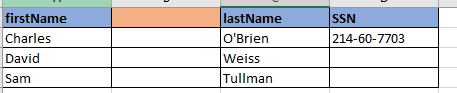

In [5]:
py_data=[]
control_number_try = []
remained = []
for i in range(len(required)):

      py_data.append(pd.read_excel(r'C:\Users\surya\Desktop\Merging\\'+required[i],skiprows = 0).columns.values)



for i in range (len(py_data)):
    py_data[i]=list(py_data[i])
py_data

unique_col=[]
for i in range (len(py_data)):
    if py_data[i] not in unique_col:
        unique_col.append(py_data[i])
unique_col

for i in range(len(unique_col)):
    for j in range(len(py_data)):
        if py_data[j]==unique_col[i]:
            print(required[j],'|','cluster',i+1 )

Proj_001.xlsx | cluster 1
Proj_002.xlsx | cluster 1
Proj_003.xlsx | cluster 2


Proj_001.xlsx and Proj_002.xlsx has same cluster name i.e. they have same headers but Proj_003.xlsx has different cluster name which means Proj_003.xlsx has different column name (because one column has added)

#### Problem Statement 4: Merge all the Excel / CSV files

After we identify all the problems we will correct it accordingly. 

*Now we will delete Proj_004.xlsx from required table

*We will also delete extra column from proj_003.xlsx

In [6]:
py_data=[]
for i in range(len(required)):
   

    ind_data = pd.read_excel(r'C:\Users\surya\Desktop\Merging\\'+required[i],skiprows = 0)
    #converters = {'PII - SSN ':str,'PII - Tax ID ':str,
    py_data.append(ind_data)
    
py_data

[  firstName  lastName          SSN
 0     Kevin     Adams  119-59-6674
 1       Rex      Rust  119-59-6674
 2     Susan  McDonald  121-33-2840,
   firstName    lastName          SSN
 0   William     O'Brien  141-59-1721
 1   Adreww       Thoele  160-26-4463
 2      Adam  Whitefield  160-26-4463,
   firstName lastName          SSN
 0   Charles  O'Brien  214-60-7703
 1     David    Weiss          NaN
 2       Sam  Tullman          NaN]

In [7]:
df_final=py_data[0]
for i in range(len(py_data)-1):
    df_final=pd.concat([df_final,py_data[i+1]])
df_final

,firstName,lastName,SSN
0,Kevin,Adams,119-59-6674
1,Rex,Rust,119-59-6674
2,Susan,McDonald,121-33-2840
0,William,O'Brien,141-59-1721
1,Adreww,Thoele,160-26-4463
2,Adam,Whitefield,160-26-4463
0,Charles,O'Brien,214-60-7703
1,David,Weiss,NaN
2,Sam,Tullman,NaN


#### Problem Statement 5: Adding a column name called "File_Name" which contains the file name

In [8]:
control_len=[]
for i in range (len(required)):
    #print(i)
    for j in range (len(py_data[i])):
        control_len.append(required[i])
df_final['File_Name']=control_len
df_final=df_final.fillna("")
df_final.to_excel(r'C:\Users\surya\Desktop\Merging\output.xlsx',index = False)

#### Final Output

In [9]:
df_final

,firstName,lastName,SSN,File_Name
0,Kevin,Adams,119-59-6674,Proj_001.xlsx
1,Rex,Rust,119-59-6674,Proj_001.xlsx
2,Susan,McDonald,121-33-2840,Proj_001.xlsx
0,William,O'Brien,141-59-1721,Proj_002.xlsx
1,Adreww,Thoele,160-26-4463,Proj_002.xlsx
2,Adam,Whitefield,160-26-4463,Proj_002.xlsx
0,Charles,O'Brien,214-60-7703,Proj_003.xlsx
1,David,Weiss,,Proj_003.xlsx
2,Sam,Tullman,,Proj_003.xlsx


### Output Data

https://github.com/SuryaSD/Compiler/blob/main/output.xlsx